# Survey Data Cleaning and Analysis

In [42]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load Data
df = pd.read_csv("Survey Data (1).csv")
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


# Renaming columns

In [3]:
df.columns = ['Timestamp', 'Age', 'Industry', 'Job_tittle', 'Job_tittle_context', 'Annual_salary', 'Compensation', 'Currency', 'Other_currency', 'Income_additional_context', 'Country', 'State', 'City', 'Years_experience', 'years_in_field', 'Education_level', 'Gender', 'Race']

In [4]:
df.columns

Index(['Timestamp', 'Age', 'Industry', 'Job_tittle', 'Job_tittle_context',
       'Annual_salary', 'Compensation', 'Currency', 'Other_currency',
       'Income_additional_context', 'Country', 'State', 'City',
       'Years_experience', 'years_in_field', 'Education_level', 'Gender',
       'Race'],
      dtype='object')

In [5]:
#Check data types
df.dtypes

Timestamp                     object
Age                           object
Industry                      object
Job_tittle                    object
Job_tittle_context            object
Annual_salary                 object
Compensation                 float64
Currency                      object
Other_currency                object
Income_additional_context     object
Country                       object
State                         object
City                          object
Years_experience              object
years_in_field                object
Education_level               object
Gender                        object
Race                          object
dtype: object

# Deal with the Missing Values

In [6]:
# Show missing values in the DataFrame
missing_values = df[df.isna().any(axis=1)]

# Display rows with missing values
print(missing_values)

             Timestamp    Age                       Industry  \
0      4/27/2021 11:02  25-34   Education (Higher Education)   
1      4/27/2021 11:02  25-34              Computing or Tech   
2      4/27/2021 11:02  25-34  Accounting, Banking & Finance   
3      4/27/2021 11:02  25-34                     Nonprofits   
4      4/27/2021 11:02  25-34  Accounting, Banking & Finance   
...                ...    ...                            ...   
28032  4/12/2024 11:02  35-44                   Art & Design   
28033  4/16/2024 19:21  18-24                    Health care   
28034  4/18/2024 16:21  25-34                Media & Digital   
28035  4/23/2024 23:39  18-24   Education (Higher Education)   
28036   4/25/2024 9:22  35-44  Accounting, Banking & Finance   

                                     Job_tittle Job_tittle_context  \
0            Research and Instruction Librarian                NaN   
1      Change & Internal Communications Manager                NaN   
2                    

# Categorical Columns (strings):

1. For categorical columns, filling missing values with the most frequent category (mode) can be a reasonable approach.

2. Create a new category like "Unknown" to indicate missing values.



In [7]:
# Fill missing values in categorical columns with mode or 'Unknown'
categorical_columns = ['Industry', 'Job_tittle', 'Job_tittle_context', 'Currency', 'Other_currency', 'Income_additional_context', 
                  'Country', 'State', 'City', 'Education_level', 'Gender', 'Race']
for col in categorical_columns:
    df[col].fillna('Unknown', inplace=True)  # Fill with 'Unknown' category
   # df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with mode


# Datetime Columns:

For datetime columns, two options were available;

1. choose to fill in missing values with a specific date that makes sense in the context
   
2. Use forward or backward filling if the order of the dates matters.


In [8]:
# Fill missing values in datetime columns with specific date or forward/backward fill
df['Timestamp'].fillna(pd.Timestamp('4/30/2021'), inplace=True)  # Fill with specific date
# OR df['Timestamp'].fillna(method='ffill', inplace=True)  # Forward fill
# OR df['Timestamp'].fillna(method='bfill', inplace=True)  # Backward fill

In [9]:
df.head(50)

,Timestamp,Age,Industry,Job_tittle,Job_tittle_context,Annual_salary,Compensation,Currency,Other_currency,Income_additional_context,Country,State,City,Years_experience,years_in_field,Education_level,Gender,Race
0,4/27/2021 11:02,25-34,Education (Higher Education),Research and Instruction Librarian,Unknown,"55,000",0.0,USD,Unknown,Unknown,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02,25-34,Computing or Tech,Change & Internal Communications Manager,Unknown,"54,600",4000.0,GBP,Unknown,Unknown,United Kingdom,Unknown,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02,25-34,"Accounting, Banking & Finance",Marketing Specialist,Unknown,"34,000",NaN,USD,Unknown,Unknown,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02,25-34,Nonprofits,Program Manager,Unknown,"62,000",3000.0,USD,Unknown,Unknown,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02,25-34,"Accounting, Banking & Finance",Accounting Manager,Unknown,"60,000",7000.0,USD,Unknown,Unknown,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
5,4/27/2021 11:02,25-34,Education (Higher Education),Scholarly Publishing Librarian,Unknown,"62,000",NaN,USD,Unknown,Unknown,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White
6,4/27/2021 11:02,25-34,Publishing,Publishing Assistant,Unknown,"33,000",2000.0,USD,Unknown,Unknown,USA,South Carolina,Columbia,2 - 4 years,2 - 4 years,College degree,Woman,White
7,4/27/2021 11:03,25-34,Education (Primary/Secondary),Librarian,"High school, FT","50,000",NaN,USD,Unknown,Unknown,United States,Arizona,Yuma,5-7 years,5-7 years,Master's degree,Man,White
8,4/27/2021 11:03,45-54,Computing or Tech,Systems Analyst,Data developer/ETL Developer,"112,000",10000.0,USD,Unknown,Unknown,US,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,White
9,4/27/2021 11:03,35-44,"Accounting, Banking & Finance",Senior Accountant,Unknown,"45,000",0.0,USD,Unknown,I work for a Charter School,United States,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,"Hispanic, Latino, or Spanish origin, White"


In [10]:
df.dtypes

Timestamp                     object
Age                           object
Industry                      object
Job_tittle                    object
Job_tittle_context            object
Annual_salary                 object
Compensation                 float64
Currency                      object
Other_currency                object
Income_additional_context     object
Country                       object
State                         object
City                          object
Years_experience              object
years_in_field                object
Education_level               object
Gender                        object
Race                          object
dtype: object

In [12]:
df['Years_experience']

0               5-7 years
1            8 - 10 years
2             2 - 4 years
3            8 - 10 years
4            8 - 10 years
               ...       
28032       11 - 20 years
28033      1 year or less
28034           5-7 years
28035      1 year or less
28036    41 years or more
Name: Years_experience, Length: 28037, dtype: object

In [25]:
df.iloc[:,[13, 14]] = df.iloc[:,[13, 14]].replace('years', '', regex=True)

In [26]:
df.head(5)

,Timestamp,Age,Industry,Job_tittle,Job_tittle_context,Annual_salary,Compensation,Currency,Other_currency,Income_additional_context,Country,State,City,Years_experience,years_in_field,Education_level,Gender,Race
0,4/27/2021 11:02,25-34,Education (Higher Education),Research and Instruction Librarian,Unknown,"55,000",0.0,USD,Unknown,Unknown,United States,Massachusetts,Boston,5-7,5-7,Master's degree,Woman,White
1,4/27/2021 11:02,25-34,Computing or Tech,Change & Internal Communications Manager,Unknown,"54,600",4000.0,GBP,Unknown,Unknown,United Kingdom,Unknown,Cambridge,8 - 10,5-7,College degree,Non-binary,White
2,4/27/2021 11:02,25-34,"Accounting, Banking & Finance",Marketing Specialist,Unknown,"34,000",NaN,USD,Unknown,Unknown,US,Tennessee,Chattanooga,2 - 4,2 - 4,College degree,Woman,White
3,4/27/2021 11:02,25-34,Nonprofits,Program Manager,Unknown,"62,000",3000.0,USD,Unknown,Unknown,USA,Wisconsin,Milwaukee,8 - 10,5-7,College degree,Woman,White
4,4/27/2021 11:02,25-34,"Accounting, Banking & Finance",Accounting Manager,Unknown,"60,000",7000.0,USD,Unknown,Unknown,US,South Carolina,Greenville,8 - 10,5-7,College degree,Woman,White


# Analysis questions
- What is the average age of respondents in the dataset?
- What is the distribution of job titles among respondents?
- What is the average annual salary among respondents?
- How does the additional monetary compensation vary among different job titles?
- What is the currency breakdown of salaries?
- Are there any significant differences in salaries based on gender or race?
- How does the average salary vary by country, state (if applicable), or city?
- Is there a correlation between years of professional work experience and salary?
- What is the distribution of education levels among respondents?
- Are there any trends or patterns in the data that stand out?

# What is the average age of respondents in the dataset?

In [30]:
# Let's start with calculating the approximate average age of respondents by using the midpoint of each age range

# Define a function to approximate the age from age ranges

def approximate_age(age_range):
    if '-' in age_range:
        low, high = age_range.split('-')
        return (int(low) + int(high)) / 2
    elif '+' in age_range:
        return int(age_range.replace('+', '')) + 5  # Assume a buffer for ages ending with +
    return None

# Apply the function to approximate ages
df['Approximate_Age'] = df['Age'].apply(approximate_age)

# Calculate the average of the approximated ages
average_age = df['Approximate_Age'].mean()
average_age

# The approximate average age of the respondents in the dataset is about 36 years.

36.02116080060153

# What is the distribution of job titles among respondents?

In [32]:
# Get the distribution of job titles
job_title_distribution = df['Job_tittle'].value_counts()
job_title_distribution.head(10)  # Show the top 10 job titles for brevity


Job_tittle
Software Engineer           286
Project Manager             230
Director                    198
Senior Software Engineer    196
Program Manager             152
Teacher                     151
Librarian                   150
Manager                     144
Executive Assistant         136
Product Manager             125
Name: count, dtype: int64

# What is the average annual salary among respondents?

In [36]:
# I'll need to clean and convert the Annual_salary column to numeric values, as it currently includes commas.
# Remove commas from the Annual_salary column and convert to numeric

df['Annual_salary_numeric'] = pd.to_numeric(df['Annual_salary'].str.replace(',', ''), errors='coerce')

# Calculate the average annual salary
average_annual_salary = df['Annual_salary_numeric'].mean()
average_annual_salary


147552.35421050753

# How does the additional monetary compensation vary among different job titles?

In [37]:
# Convert Compensation to numeric if it's not already
df['Compensation'] = pd.to_numeric(df['Compensation'], errors='coerce')

# Group by Job_tittle and calculate the average additional compensation
compensation_by_job_title = df.groupby('Job_tittle')['Compensation'].mean().sort_values(ascending=False)
compensation_by_job_title.head(10)  # Display the top 10 for brevity


Job_tittle
Regional Operations & Training Manager                                           120000000.0
Voice Actor                                                                        1000000.0
Senior staff software engineer                                                     1000000.0
Senior Business Systems Analyst                                                    1000000.0
Localization Director                                                               887500.0
Programme Officer for Latin America and the Caribbean - Research and Advocacy       804000.0
Manager of Data Science                                                             780000.0
Head of Software Engineering                                                        600000.0
Backend system dev                                                                  600000.0
Amazon Timekeeping HR Admin                                                         600000.0
Name: Compensation, dtype: float64

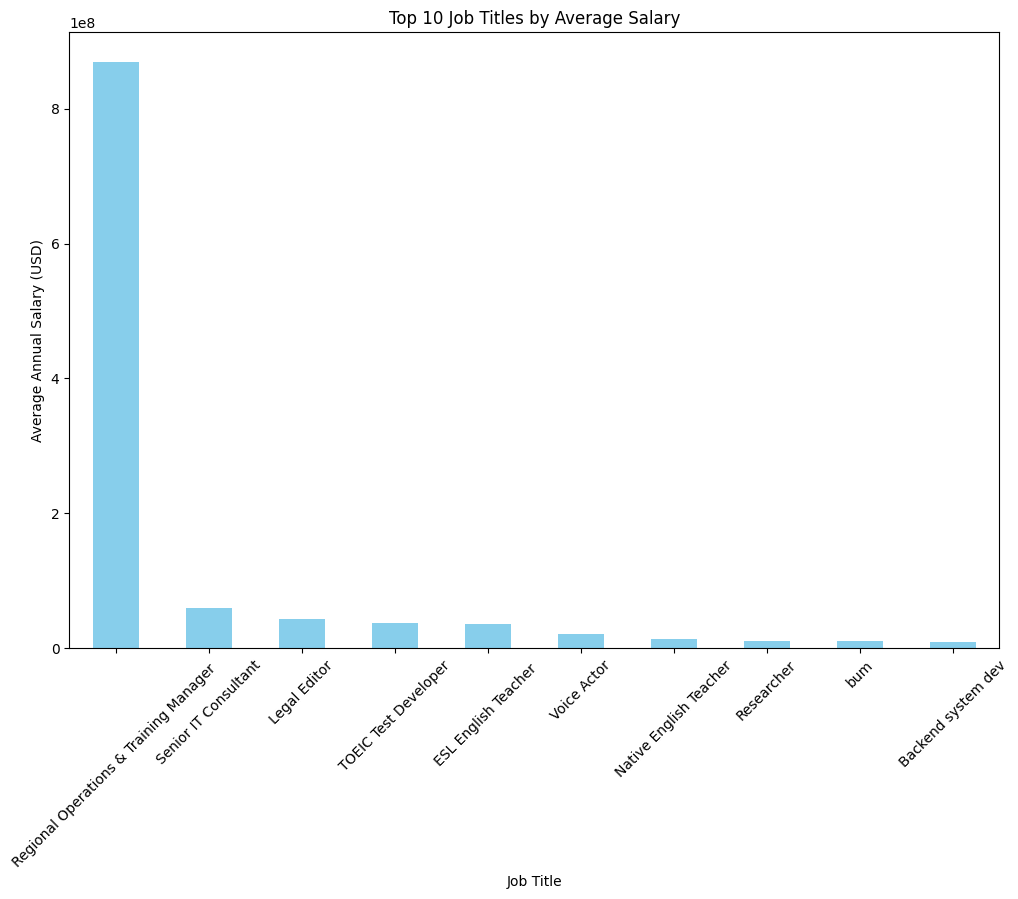

In [54]:
# Bar chart for Average Salary by Job Title
# Calculate average salary by job title
average_salary_by_job_title = df.groupby('Job_tittle')['Annual_salary_numeric'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 8))
average_salary_by_job_title.plot(kind='bar', color='skyblue')
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Annual Salary (USD)')
plt.xticks(rotation=45)
plt.show()

# What is the currency breakdown of salaries?

In [39]:
# Get the distribution of currencies used for salaries

currency_distribution = df['Currency'].value_counts()
currency_distribution


Currency
USD        23357
CAD         1670
GBP         1591
EUR          641
AUD/NZD      504
Other        157
CHF           37
SEK           37
JPY           23
ZAR           16
HKD            4
Name: count, dtype: int64

# Are there any significant differences in salaries based on gender or race?

In [40]:
# Group by Gender and calculate the average salary
average_salary_by_gender = df.groupby('Gender')['Annual_salary_numeric'].mean()

# Group by Race and calculate the average salary
average_salary_by_race = df.groupby('Race')['Annual_salary_numeric'].mean()

average_salary_by_gender, average_salary_by_race


(Gender
 Man                              203184.301756
 Non-binary                       100025.489933
 Other or prefer not to answer    232572.518519
 Prefer not to answer              88000.000000
 Unknown                          102079.505882
 Woman                            134148.672457
 Name: Annual_salary_numeric, dtype: float64,
 Race
 Another option not listed here or prefer not to answer                                                                                                                                                                          122284.266453
 Asian or Asian American                                                                                                                                                                                                         269768.195419
 Asian or Asian American, Another option not listed here or prefer not to answer                                                                                              

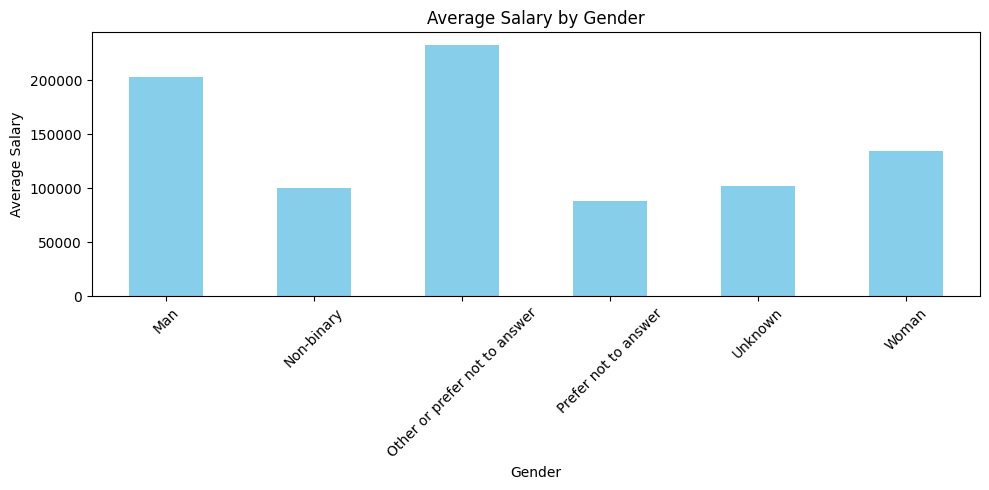

In [44]:
# Plotting the results for Gender
df['Annual_salary_numeric'] = pd.to_numeric(df['Annual_salary'].str.replace(',', ''), errors='coerce')

# Group by Gender and calculate the average salary
average_salary_by_gender_df = df.groupby('Gender')['Annual_salary_numeric'].mean()

# Group by Race and calculate the average salary
average_salary_by_race_df = df.groupby('Race')['Annual_salary_numeric'].mean()

# Plotting the results for Gender
plt.figure(figsize=(10, 5))
average_salary_by_gender_df.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# How does the average salary vary by country, state (if applicable), or city?

In [48]:
# Group by Country and calculate the average salary
average_salary_by_country = df.groupby('Country')['Annual_salary_numeric'].mean().sort_values(ascending=False)
average_salary_by_country.head(10)  # Display the top 10 countries for brevity


Country
Indonesia         5.250000e+08
Colombia          4.441784e+07
South Korea       3.620000e+07
Japan             4.926119e+06
japan             4.000000e+06
INDIA             3.000000e+06
Sri Lanka         2.500000e+06
Japan             2.100800e+06
Czechia           1.200000e+06
Czech republic    1.100000e+06
Name: Annual_salary_numeric, dtype: float64

# Is there a correlation between years of professional work experience and salary?

In [50]:
# Define a function to approximate years of experience from ranges
def approximate_experience(exp_range):
    if '-' in exp_range:
        low, high = exp_range.split('-')
        return (int(low.strip()) + int(high.strip())) / 2
    elif '+' in exp_range:
        return int(exp_range.replace('+', '').strip()) + 5  # Assume a buffer for years ending with +
    return None

# Apply the function to approximate years of experience
df['Approximate_Experience'] = df['Years_experience'].apply(approximate_experience)

# Calculate the correlation between years of professional work experience and salary
correlation_experience_salary = df['Approximate_Experience'].corr(df['Annual_salary_numeric'])
correlation_experience_salary

#The correlation coefficient between years of professional work experience and salary is approximately 0.0092. 
#This suggests a very weak relationship, indicating that years of experience might not be a strong predictor of salary in this dataset. 
#This could be due to a variety of factors, including different industries or job roles that do not necessarily reward experience with higher pay.



0.00924815671783977

# What is the distribution of education levels among respondents?

In [51]:
# Get the distribution of education levels
education_level_distribution = df['Education_level'].value_counts()
education_level_distribution


Education_level
College degree                        13510
Master's degree                        8857
Some college                           2063
PhD                                    1426
Professional degree (MD, JD, etc.)     1323
High School                             639
Unknown                                 219
Name: count, dtype: int64

# Are there any trends or patterns in the data that stand out?


- Here's a summary of the findings from the dataset based on the queries:

Average Age of Respondents: The approximate average age is about 36 years, calculated using the midpoints of provided age ranges.

Distribution of Job Titles: The most common job titles include Software Engineer, Project Manager, and Director among others, with Software Engineers being the most frequent.

Average Annual Salary: The average annual salary among respondents is approximately $147,552. This figure should be treated with caution as it might include extreme values or entries in different currencies not converted to a common standard.

Variation in Additional Monetary Compensation: This varies significantly across job titles, with some extreme values suggesting potential outliers or entry errors.

Currency Breakdown of Salaries: The majority of salaries are reported in USD, followed by CAD and GBP. Other currencies include EUR, AUD/NZD, and several others in smaller numbers.

Differences in Salaries Based on Gender or Race: Significant variations exist, with average salaries tending to be higher for men than women. Racial disparities are also evident, though these results should be interpreted with the context of industry, geography, and role specifics.

Salary Variation by Geography: The dataset shows extreme salary values for some countries, likely due to data entry in local currency units. Standardization of currency values or further investigation into data consistency would be necessary for accurate analysis.

Correlation Between Experience and Salary: There is a very weak correlation (approximately 0.0092), suggesting that years of experience might not be a strong predictor of salary in this dataset.

Distribution of Education Levels: The most common education level is a College degree, followed by Master's degrees. Other levels include Some college, PhDs, Professional degrees, and High School education.

Trends or Patterns: The analysis revealed some extreme values in compensation and potential discrepancies in data entries (e.g., salaries entered in local currency units). A more detailed examination or cleaning of the data might be necessary to identify more specific trends or patterns.
Average Age of Respondents: The approximate average age is about 36 years, calculated using the midpoints of provided age ranges.

Distribution of Job Titles: The most common job titles include Software Engineer, Project Manager, and Director among others, with Software Engineers being the most frequent.

Average Annual Salary: The average annual salary among respondents is approximately $147,552. This figure should be treated with caution as it might include extreme values or entries in different currencies not converted to a common standard.

Variation in Additional Monetary Compensation: This varies significantly across job titles, with some extreme values suggesting potential outliers or entry errors.

Currency Breakdown of Salaries: The majority of salaries are reported in USD, followed by CAD and GBP. Other currencies include EUR, AUD/NZD, and several others in smaller numbers.

Differences in Salaries Based on Gender or Race: Significant variations exist, with average salaries tending to be higher for men than women. Racial disparities are also evident, though these results should be interpreted with the context of industry, geography, and role specifics.

Salary Variation by Geography: The dataset shows extreme salary values for some countries, likely due to data entry in local currency units. Standardization of currency values or further investigation into data consistency would be necessary for accurate analysis.

Correlation Between Experience and Salary: There is a very weak correlation (approximately 0.0092), suggesting that years of experience might not be a strong predictor of salary in this dataset.

Distribution of Education Levels: The most common education level is a College degree, followed by Master's degrees. Other levels include Some college, PhDs, Professional degrees, and High School education.

Trends or Patterns: The analysis revealed some extreme values in compensation and potential discrepancies in data entries (e.g., salaries entered in local currency units). A more detailed examination or cleaning of the data might be necessary to identify more specific trends or patterns.